In [4]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [5]:
def norm(a):
    return np.linalg.norm(a);

def normal(t):
    tx, ty = t
    n = np.array([-ty, tx]);
    return n

def tangent(a, b, c):
    d1 = norm(b-a);
    d2 = norm(c-b)
    t = -a*d2/d1/(d1+d2) -b*(d1-d2)/d1/d2 + c*d1/d2/(d1+d2);
    l = norm(t);
    return (t/l)

def kappa(t1, t2, a, b):
    n = normal(b-a);  
    kn = t2 - t1;
    kappa = norm(kn)*np.sign(np.dot(kn,n))/norm(n);
    return kappa;
    
def tangent2(ta, tb, a, b):
    n = tb - ta;
    n = n*np.sign(kappa(ta, tb, a, b))/norm(n);
    t = -normal(n);
    return t;

def centroid(a,b):
    c = (a+b)*0.5
    return c;
   
def Hermite(a,b,ta,tb,s):
    l = norm(a-b);
    return ((2*(a-b) + l*(ta+tb))*s*s*s + (-3*(a-b) - l*(2*ta+tb))*s*s +  l*ta*s + a)

def dHermite(a,b,ta,tb,s):
    l = norm(a-b);
    t = 3*(2*(a-b)/l + (ta+tb))*s*s + 2*(-3*(a-b)/l - (2*ta+tb))*s +  ta
    return (t/norm(t))

def kappa5(a,b,c,d,e):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    td = tangent(c,d,e);
    xl = Hermite(b,c,tb,tc,0.5);
    xr = Hermite(c,d,tc,td,0.5);
    tl = dHermite(b,c,tb,tc,0.5);
    tr = dHermite(c,d,tc,td,0.5);
    return (kappa(tl, tr, xl, xr))

def kappa4(a,b,c,d):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    return (kappa(tb, tc, b, c))

In [28]:
def boundary(x,y):
    xb = []
    yb = []
    for i_ in range(5):
        i = 5-i_;
        xb.append(-x[i])
        yb.append(y[i])
    l, = np.shape(x)
    for i in range(l):
        xb.append(x[i])
        yb.append(y[i])
    for i_ in range(5):
        i = (l-2)-i_
        xb.append(4.0-x[i])
        yb.append(y[i])
    return xb,yb
def boundary_symm(s):
    sb = []
    for i_ in range(5):
        i = 5-i_;
        sb.append(s[i])
    l, = np.shape(s)
    for i in range(l):
        sb.append(s[i])
    for i_ in range(5):
        i = (l-2)-i_
        sb.append(s[i])
    return sb

def kappa_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa5(a,b,c,d,e))
    return k;

def kappa_centroid_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 11;
    xcentroid = []; k = [];
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        xcentroid.append(centroid(c,d)[0])
        k.append(kappa4(b,c,d,e))
    return xcentroid,k;

def dk_ds_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    dkds = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tb = tangent(a,b,c);
        tc = tangent(b,c,d);
        td = tangent(c,d,e);
        xl = Hermite(b,c,tb,tc,0.5);
        xr = Hermite(c,d,tc,td,0.5);
        kl = kappa4(a,b,c,d)
        kr = kappa4(b,c,d,e)
        val = (kr-kl)/norm(xr-xl);
        dkds.append(val)
    return dkds;

def ddk_dsds_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    ddk_dsds = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tb = tangent(a,b,c);
        tc = tangent(b,c,d);
        td = tangent(c,d,e);
        xl = Hermite(b,c,tb,tc,0.5);
        xr = Hermite(c,d,tc,td,0.5);
        kl = kappa4(a,b,c,d)
        km = kappa5(a,b,c,d,e)
        kr = kappa4(b,c,d,e)
        dr = norm(xr-c);
        dl = norm(c-xl);
        val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
        ddk_dsds.append(val)
    return ddk_dsds;



In [29]:
f = open('capwave_4', 'r')
data = np.genfromtxt(f, delimiter=',')
#plot(data[:,0],data[:,1],'o')
f.close()
l, = np.shape(data);
l = np.int(l/2)
x = []; y = [];
for i in range(l):
    x.append(data[2*i])
    y.append(data[2*i+1])
x = 2*np.ones(l) - x
x[0] = 0.


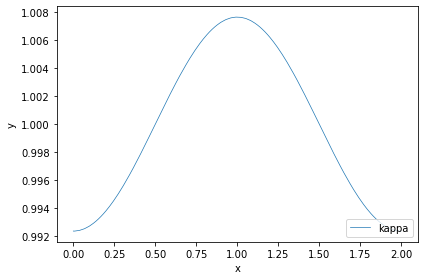

In [30]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "profile")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

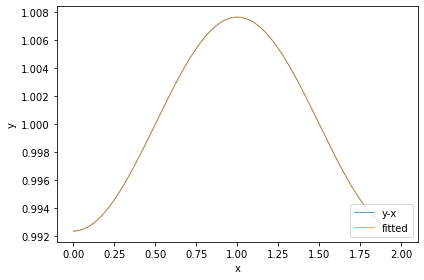

In [105]:
# cosine wave fitted to the damping wave profile
from scipy.optimize import leastsq
#parameters [guess_amp, guess_freq, guess_phase, guess_mean]
optimize_func = lambda par: par[0]*np.cos(par[1]*x+par[2]) + par[3] - y
par0 = [0.01, np.pi, np.pi, 1.0]

est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, par0)[0]

# recreate the fitted curve using the optimized parameters
yfit = est_amp*np.cos(est_freq*x+est_phase) + est_mean

fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "y-x")
ax1.plot(x, yfit, linewidth = 0.7, label = "fitted")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

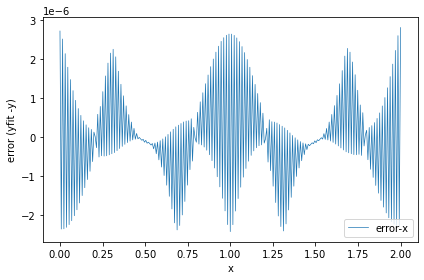

In [108]:
#error
fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("error (yfit -y)")
ax1.plot(x, y-yfit, linewidth = 0.7, label = "error-x")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

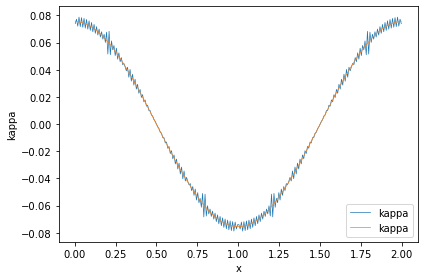

In [140]:
xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
xc, kappavc = kappa_centroid_vector(xb,yb)

fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("kappa")
#ax1.plot(x, kappav, linewidth = 0.7, label = "kappa")
ax1.plot(xc, kappavc, linewidth = 0.7, label = "kappa")

xb,yb = boundary(x,yfit)
xc,kappavc_fit = kappa_centroid_vector(xb,yb)
ax1.plot(xc, kappavc_fit, linewidth = 0.7, label = "kappa")

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

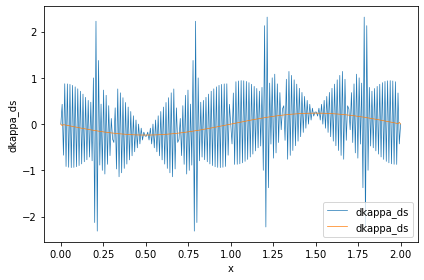

In [141]:
xb,yb = boundary(x,y)
dkappav = dk_ds_vector(xb,yb)
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("dkappa_ds")
ax1.plot(x, dkappav, linewidth = 0.7, label = "dkappa_ds")

xb,yb = boundary(x,yfit)
dkappav_fit = dk_ds_vector(xb,yb)
ax1.plot(x, dkappav_fit, linewidth = 0.7, label = "dkappa_ds fit")


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

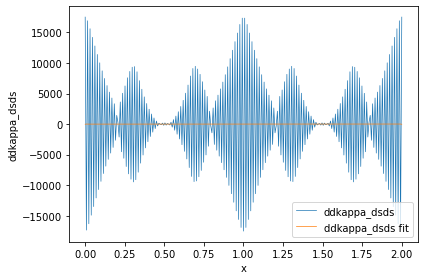

In [142]:
xb,yb = boundary(x,y)
ddkappav = ddk_dsds_vector(xb,yb)
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("ddkappa_dsds")
ax1.plot(x, ddkappav, linewidth = 0.7, label = "ddkappa_dsds")

xb,yb = boundary(x,yfit)
ddkappav_fit = ddk_dsds_vector(xb,yb)
ax1.plot(x, ddkappav_fit, linewidth = 0.7, label = "ddkappa_dsds fit")


#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [143]:
# def objective_local(ul,u,ur,a0,b0,c0,d0,e0): 
#     vl = ul*normal(tangent(a0,b0,c0));
#     v  = u *normal(tangent(b0,c0,d0));
#     vr = ur*normal(tangent(c0,d0,e0));
#     a = a0; b=b0+vl; c=c0+v; d=d0+vr; e= e0;
#     tb = tangent(a,b,c);
#     tc = tangent(b,c,d);
#     td = tangent(c,d,e);
#     xl = Hermite(b,c,tb,tc,0.5);
#     xr = Hermite(c,d,tc,td,0.5);
#     kl = kappa4(a,b,c,d);
#     km = kappa5(a,b,c,d,e);
#     kr = kappa4(b,c,d,e);
#     dr = norm(xr-c);
#     dl = norm(c-xl);
#     o = np.power(((kr-km)/dr - (km-kl)/dl)/(dl+dr), 2)
#     return o;

# def objective(u,aa,a,b,c,d,e,ee): 
#     n = normal(tangent(b,c,d));
#     o = objective_local(0.,0.,u,aa,a,b,c,d);
#     o += objective_local(0.,u,0.,a,b,c,d,e);
#     o += objective_local(u,0.,0.,b,c,d,e,ee);
#     return o;

# def objective(u,a,b,c,d,e): 
#     n = normal(tangent(b,c,d));
#     v = u*n;
#     tb = tangent(a,b,c+v);
#     tc = tangent(b,c+v,d);
#     td = tangent(c+v,d,e);
#     xl = Hermite(b,c+v,tb,tc,0.5);
#     xr = Hermite(c+v,d,tc,td,0.5);
#     kl = kappa4(a,b,c+v,d);
#     km = kappa5(a,b,c+v,d,e);
#     kr = kappa4(b,c+v,d,e);
#     dr = norm(xr-c-v);
#     dl = norm(c+v-xl);
#     o = np.power(((kr-km)/dr - (km-kl)/dl)/(dl+dr), 2)
#     return o;

# def objective(u,aa,a,b,c,d,e,ee): 
#     n = normal(tangent(b,c,d));
#     v = u*n;
#     kl = kappa5(aa,a,b,c+v,d);
#     km = kappa5(a,b,c+v,d,e);
#     kr = kappa5(b,c+v,d,e,ee);
#     dr = norm(d-c-v);
#     dl = norm(c+v-b);
#     o = np.power(((kr-km)/dr - (km-kl)/dl)/(dl+dr), 2)
#     return o;

# def objective(u,aa,a,b,c,d,e,ee): 
#     n = normal(tangent(b,c,d));
#     v = u*n;
#     kll = kappa4(aa,a,b,c+v);
#     kl  = kappa4(a,b,c+v,d);
#     kr = kappa4(b,c+v,d,e);
#     krr = kappa4(c+v,d,e,ee);
#     km = 0.5*(kl+kr);
#     kl = 0.5*(kl+kll)
#     kr = 0.5*(kr+krr)
#     o = np.power(2*km - kl - kr, 2)
#     return o;

# def kappa_special(a,b,c,d,e):
#     tb = tangent(a,b,c);
#     td = tangent(c,d,e);
#     return (kappa(tb, td, b, d))

# def objective(u,aa,a,b,c,d,e,ee): 
#     n = normal(tangent(b,c,d));
#     v = u*n;
#     kl = kappa4(a,b,c+v,d);
#     km = kappa_special(a,b,c+v,d,e)
#     kr = kappa4(b,c+v,d,e);
#     o = np.power(2*km - kl - kr, 2)
#     return o;


# def smooth(xf, yf, N):
#     fval_norm2 = []
#     l, = np.shape(xf)
#     obj_i = np.zeros(np.shape(xf))
#     for ii in range(N):
#         xb, yb = boundary(xf,yf)
#         xtemp = xf#
#         ytemp = yf
#         ival_norm2 = 0.
#         ival_max = 0.
#         for i_ in range(l):
#             i = i_ + 5;
#             aa = np.array([xb[i-3],yb[i-3]]);
#             a = np.array([xb[i-2],yb[i-2]]);
#             b = np.array([xb[i-1],yb[i-1]]);
#             c = np.array([xb[i],yb[i]]);
#             d = np.array([xb[i+1],yb[i+1]]);
#             e = np.array([xb[i+2],yb[i+2]]);
#             ee = np.array([xb[i+3],yb[i+3]]);
#             u0 = 0.
#             res = minimize(objective, u0, args = (aa,a,b,c,d,e,ee), method='nelder-mead',
#                options={'xatol': 1e-8,'maxiter':5, 'disp': False})
#             n = normal(tangent(b,c,d));
#             xtemp[i_] = xtemp[i_] + 0.1*n[0]*res.x#
#             ytemp[i_] = ytemp[i_] + 0.1*n[1]*res.x
#             #norms
#             #ival_max = np.max(np.fabs(ival_max),res.fun) 
#             ival_norm2 += np.power(res.fun,2)
#             obj_i[i_] = res.fun;
#         xf = xtemp
#         yf = ytemp
#         #norms
#         ival_norm2 = np.sqrt(ival_norm2)
#         fval_norm2.append(ival_norm2)
#     return fval_norm2, obj_i


In [144]:
# #local optimisation objective fn is defined at centroid of element [c,d]
# def objective_local(u,a,b,c,d,e,f): 
#     kl = kappa4(a,b,c,d);
#     km = kappa4(b,c,d,e)
#     kr = kappa4(c,d,e,f);
#     o = np.power(2*km - kl - kr, 2)
#     return o;

# def objective(u,aa,a,b,c0,d0,e,f,ff): 
#     c = c0 + u*normal(tangent(b,c0,d0));
#     d = d0 - u*normal(tangent(c0,d0,e));
#     o = objective_local(u,a,b,c,d,e,f)
#     o += objective_local(u,aa,a,b,c,d,e)
#     o += objective_local(u,b,c,d,e,f,ff)
#     return o;


# def smooth_tangent(xf, yf, N):
#     fval_norm2 = []
#     l, = np.shape(xf)
#     l = l - 1; #local optimisation objective fn is defined at centroid
#     obj_i = np.zeros(np.shape(xf))
#     for ii in range(N):
#         xb, yb = boundary(xf,yf)
#         xtemp = xf#
#         ytemp = yf
#         ival_norm2 = 0.
#         ival_max = 0.
#         for i_ in range(l):
#             i = i_ + 5;
#             aa= np.array([xb[i-3],yb[i-3]]);
#             a = np.array([xb[i-2],yb[i-2]]);
#             b = np.array([xb[i-1],yb[i-1]]);
#             c = np.array([xb[i],yb[i]]);
#             d = np.array([xb[i+1],yb[i+1]]);
#             e = np.array([xb[i+2],yb[i+2]]);
#             f = np.array([xb[i+3],yb[i+3]]);
#             ff= np.array([xb[i+4],yb[i+4]]);
#             u0 = 0.
#             res = minimize(objective, u0, args = (aa,a,b,c,d,e,f,ff), method='nelder-mead',
#                options={'xatol': 1e-8,'maxiter':5, 'disp': False})
#             n = normal(tangent(b,c,d));
#             xtemp[i_] += 0.1*n[0]*res.x
#             ytemp[i_] += 0.1*n[1]*res.x
#             n = normal(tangent(c,d,e));
#             xtemp[i_+1] -= 0.1*n[0]*res.x
#             ytemp[i_+1] -= 0.1*n[1]*res.x
#             #norms
#             #ival_max = np.max(np.fabs(ival_max),res.fun) 
#             ival_norm2 += np.power(res.fun,2)
#             obj_i[i_] = res.fun;
#         xf = xtemp
#         yf = ytemp
#         #norms
#         ival_norm2 = np.sqrt(ival_norm2)
#         fval_norm2.append(ival_norm2)
#     return fval_norm2, obj_i


In [145]:
# #local optimisation objective fn is defined at centroid of element [c,d]
# def objective_local(u,a,b,c,d,e,f): 
#     kl = kappa4(a,b,c,d);
#     km = kappa4(b,c,d,e)
#     kr = kappa4(c,d,e,f);
#     o = np.power(2*km - kl - kr, 2)
#     return o;

# def objective(u,aa,a,b,c0,d0,e,f,ff): 
#     c = c0 + u[0]*normal(tangent(b,c0,d0));
#     d = d0 + u[1]*normal(tangent(c0,d0,e));
#     o = objective_local(u,a,b,c,d,e,f)
#     o += objective_local(u,aa,a,b,c,d,e)
#     o += objective_local(u,b,c,d,e,f,ff)
#     return o;


# def smooth_tangent(xf, yf, N):
#     fval_norm2 = []
#     l, = np.shape(xf)
#     l = l - 1; #local optimisation objective fn is defined at centroid
#     obj_i = np.zeros(np.shape(xf))
#     for ii in range(N):
#         xb, yb = boundary(xf,yf)
#         xtemp = xf#
#         ytemp = yf
#         ival_norm2 = 0.
#         ival_max = 0.
#         for i_ in range(l):
#             i = i_ + 5;
#             aa= np.array([xb[i-3],yb[i-3]]);
#             a = np.array([xb[i-2],yb[i-2]]);
#             b = np.array([xb[i-1],yb[i-1]]);
#             c = np.array([xb[i],yb[i]]);
#             d = np.array([xb[i+1],yb[i+1]]);
#             e = np.array([xb[i+2],yb[i+2]]);
#             f = np.array([xb[i+3],yb[i+3]]);
#             ff= np.array([xb[i+4],yb[i+4]]);
#             u0 = np.array([0.,0.])
#             res = minimize(objective, u0, args = (aa,a,b,c,d,e,f,ff), method='nelder-mead',
#                options={'xatol': 1e-8,'maxiter':5, 'disp': False})
#             n = normal(tangent(b,c,d));
#             xtemp[i_] += 0.1*n[0]*res.x[0]
#             ytemp[i_] += 0.1*n[1]*res.x[0]
#             n = normal(tangent(c,d,e));
#             xtemp[i_+1] += 0.1*n[0]*res.x[1]
#             ytemp[i_+1] += 0.1*n[1]*res.x[1]
#             #norms
#             #ival_max = np.max(np.fabs(ival_max),res.fun) 
#             ival_norm2 += np.power(res.fun,2)
#             obj_i[i_] = res.fun;
#         xf = xtemp
#         yf = ytemp
#         #norms
#         ival_norm2 = np.sqrt(ival_norm2)
#         fval_norm2.append(ival_norm2)
#     return fval_norm2, obj_i


In [146]:
#local optimisation objective fn is defined at centroid of element [c,d]
def objective_local(u,a,b,c,d,e,f): 
    kl = kappa4(a,b,c,d);
    km = kappa4(b,c,d,e)
    kr = kappa4(c,d,e,f);
    o = np.power(2*km - kl - kr, 2)
    return o;

def objective(u,aa,a,b,c0,d0,e,f,ff): 
    c = c0 + u*normal(tangent(b,c0,d0));
    d = d0 - u*normal(tangent(c0,d0,e));
    o = objective_local(u,a,b,c,d,e,f)
    o += objective_local(u,aa,a,b,c,d,e)
    o += objective_local(u,b,c,d,e,f,ff)
    return o;

def smooth_tangent(xf, yf, N):
    fval_norm2 = []
    l, = np.shape(xf)
    l = l - 1; #local optimisation objective fn is defined at centroid
    obj_i = np.zeros(np.shape(xf))
    for ii in range(N):
        xb, yb = boundary(xf,yf)
        xtemp = xf#
        ytemp = yf
        ival_norm2 = 0.
        ival_max = 0.
        for i_ in range(l):
            i = i_ + 5;
            aa= np.array([xb[i-3],yb[i-3]]);
            a = np.array([xb[i-2],yb[i-2]]);
            b = np.array([xb[i-1],yb[i-1]]);
            c = np.array([xb[i],yb[i]]);
            d = np.array([xb[i+1],yb[i+1]]);
            e = np.array([xb[i+2],yb[i+2]]);
            f = np.array([xb[i+3],yb[i+3]]);
            ff= np.array([xb[i+4],yb[i+4]]);
            u0 = 0.
            res = minimize(objective, u0, args = (aa,a,b,c,d,e,f,ff), method='nelder-mead',
               options={'xatol': 1e-12,  'disp': False})
            #'maxiter':5,
            n = normal(tangent(b,c,d));
            xtemp[i_] += 0.4*n[0]*res.x
            ytemp[i_] += 0.4*n[1]*res.x
            n = normal(tangent(c,d,e));
            xtemp[i_+1] -= 0.4*n[0]*res.x
            ytemp[i_+1] -= 0.4*n[1]*res.x
            #norms
            #ival_max = np.max(np.fabs(ival_max),res.fun) 
            ival_norm2 += np.power(res.fun,2)
            obj_i[i_] = res.fun;
        xf = xtemp
        yf = ytemp
        #norms
        ival_norm2 = np.sqrt(ival_norm2)
        fval_norm2.append(ival_norm2)
    return fval_norm2, obj_i


In [130]:
ys = np.copy(y)
xs = np.copy(x)
#norm2, obji = smooth(xs,ys,15)
norm2, obji = smooth_tangent(xs,ys,20)

#further smoothing
yss = np.copy(ys)
xss = np.copy(xs)
#norm2_, obji_ = smooth(xss,yss,15)
norm2_, obji_ = smooth_tangent(xss,yss,20)

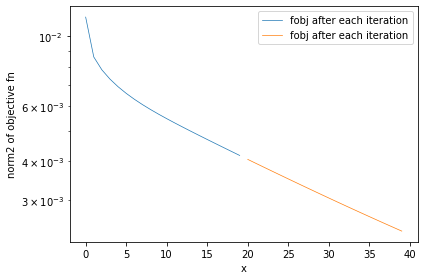

In [131]:
#second norm of objective after each iteration in smooth()
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("norm2 of objective fn")
l, = np.shape(norm2)
itern = np.arange(0, l)
ax1.semilogy(itern,norm2, linewidth = 0.7, label = "fobj after each iteration")
itern = np.arange(l, 2*l)
ax1.semilogy(itern,norm2_, linewidth = 0.7, label = "fobj after each iteration")


ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

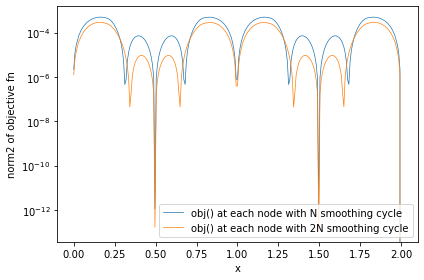

In [133]:
#objective after N smoothing cycles at each node
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("norm2 of objective fn")
ax1.semilogy(x,obji, linewidth = 0.7, label = "obj() at each node with N smoothing cycle")
ax1.semilogy(x,obji_, linewidth = 0.7, label = "obj() at each node with 2N smoothing cycle")
# for ncycle in range(5):
#     norm2_, obji_ = smooth(xss,yss,30)
#     ax1.semilogy(x,obji_, linewidth = 0.7)

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [152]:
norm2_, obji_ = smooth_tangent(xss,yss,80)

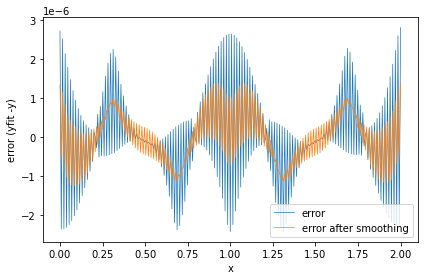

In [153]:
#error after smoothing. w.r.t to cosine fit
fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("error (yfit -y)")
ax1.plot(x, y-yfit, linewidth = 0.7, label = "error")
ax1.plot(xss, yss-yfit, linewidth = 0.7, label = "error after smoothing")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

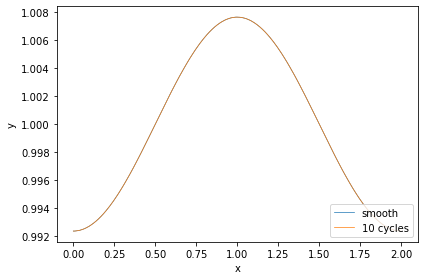

In [154]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "smooth")
ax1.plot(xss, yss, linewidth = 0.7, label = "10 cycles")


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [155]:
xb,yb = boundary(x,y)
#kappav = kappa_vector(xb,yb)
xc,kappav = kappa_centroid_vector(xb,yb)
dkappav = dk_ds_vector(xb,yb)
ddkappav = ddk_dsds_vector(xb,yb)


xb,yb = boundary(xss,yss)
#kappasv = kappa_vector(xb,yb)
xc,kappasv = kappa_centroid_vector(xb,yb)
dkappasv = dk_ds_vector(xb,yb)
ddkappasv = ddk_dsds_vector(xb,yb)


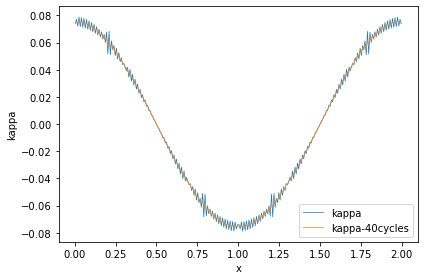

In [156]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("kappa")
ax1.plot(xc, kappav, linewidth = 0.7, label = "kappa")
ax1.plot(xc, kappasv, linewidth = 0.7, label = "kappa-40cycles")

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

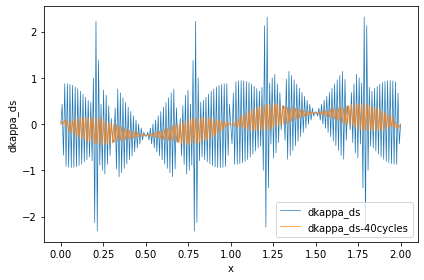

In [157]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("dkappa_ds")
ax1.plot(x, dkappav, linewidth = 0.7, label = "dkappa_ds")
ax1.plot(xs, dkappasv, linewidth = 0.7, label = "dkappa_ds-40cycles")


#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

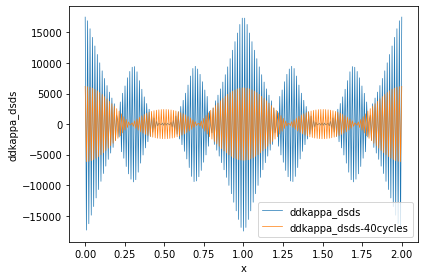

In [158]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("ddkappa_dsds")
ax1.plot(x, ddkappav, linewidth = 0.7, label = "ddkappa_dsds")
#ax1.plot(x, ddkappa2v, linewidth = 0.7, label = "ddkappa_dsds-noise")
ax1.plot(xs, ddkappasv, linewidth = 0.7, label = "ddkappa_dsds-40cycles")


#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()